# Detecção de Transações Fraudulentas

Este notebook aborda o problema de detecção de transações fraudulentas utilizando o conjunto de dados `../data/databaseFraude.csv`. O objetivo é desenvolver um modelo preditivo para identificar se uma transação é fraude ou não.

### Integrantes:
- *João Victor Azevedo dos Santos*
- *Nathan Maurício Rodrigues Lopes*
- *Paulo Vinícius Isidro Batista*
- *Yago Péres dos Santos*

## Etapas do Notebook:
1. **Análise Exploratória de Dados (EDA)**
2. **Treinamento de Modelos (KNN, Árvore de Decisão, Regressão Logística)**
3. **Identificação das Features Mais Importantes**
4. **Avaliação dos Modelos (Matriz de Confusão, Acurácia, Precisão, Recall)**
5. **Ajustes e Melhoria de Desempenho**

## 1. Importação de Bibliotecas e Carregamento dos Dados

In [1]:
# Importação das bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Carregamento dos dados
data = pd.read_csv('../data/databaseFraude.csv')

# Apenas dados numéricos
numeric_data = data.select_dtypes(include=['number'])

data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


## 2. Análise Exploratória de Dados (EDA)

In [2]:
# Informações gerais sobre o dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [3]:
# Estatísticas descritivas
numeric_data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [4]:
# Verificar valores nulos
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

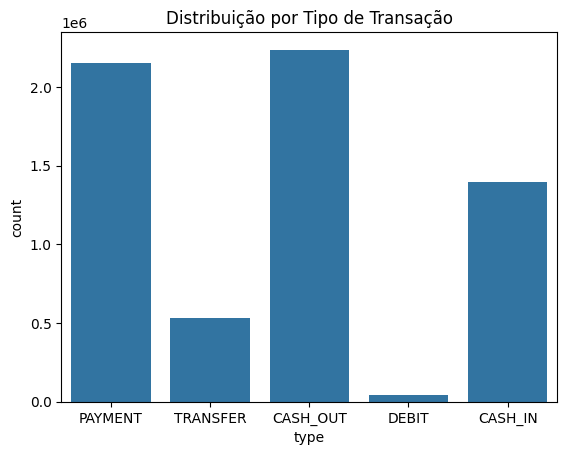

In [5]:
# Distribuição das transações por tipo
sns.countplot(x='type', data=data)
plt.title('Distribuição por Tipo de Transação')
plt.show()

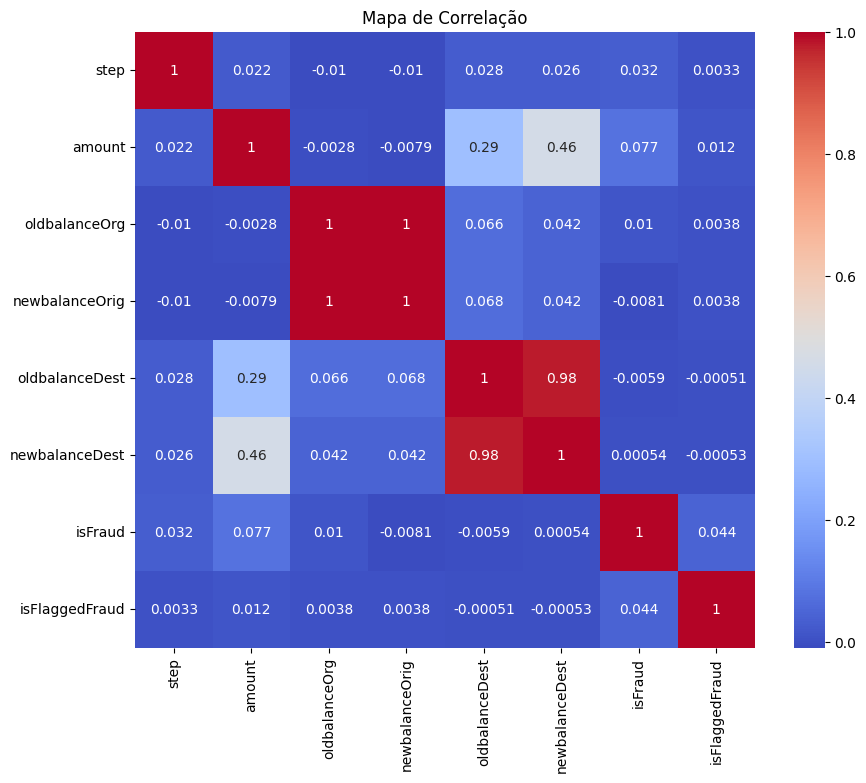

In [6]:
# Heatmap de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de Correlação')
plt.show()

## 3. Preparação dos Dados

In [7]:
# Remoção de colunas irrelevantes
data = data.drop(['nameOrig', 'nameDest'], axis=1)

# Tratamento de valores nulos
data = data.dropna()
numeric_data = numeric_data.dropna()

# Separação de features (X) e target (y)
X = numeric_data.drop('isFraud', axis=1)
y = numeric_data['isFraud']

# Divisão em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 4. Treinamento e Avaliação dos Modelos

In [8]:
# Modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print('Acurácia do KNN:', accuracy_score(y_test, y_pred_knn))

Acurácia do KNN: 0.9994499121431109


In [9]:
# Modelo Árvore de Decisão
tree = DecisionTreeClassifier(max_depth=5)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
print('Acurácia da Árvore de Decisão:', accuracy_score(y_test, y_pred_tree))

Acurácia da Árvore de Decisão: 0.9990986417544974


In [10]:
# Modelo Regressão Logística
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
print('Acurácia da Regressão Logística:', accuracy_score(y_test, y_pred_logreg))

Acurácia da Regressão Logística: 0.9992738840289064


## 5. Comparação de Métricas

In [11]:
# Comparação de precisão e recall
print('Precisão do KNN:', precision_score(y_test, y_pred_knn))
print('Recall do KNN:', recall_score(y_test, y_pred_knn))

print('Precisão da Árvore de Decisão:', precision_score(y_test, y_pred_tree))
print('Recall da Árvore de Decisão:', recall_score(y_test, y_pred_tree))

print('Precisão da Regressão Logística:', precision_score(y_test, y_pred_logreg))
print('Recall da Regressão Logística:', recall_score(y_test, y_pred_logreg))

Precisão do KNN: 0.8522205206738132
Recall do KNN: 0.687037037037037
Precisão da Árvore de Decisão: 0.7430626927029804
Recall da Árvore de Decisão: 0.4462962962962963
Precisão da Regressão Logística: 0.9037122969837587
Recall da Regressão Logística: 0.4808641975308642


## 6. Análise de Importância das Features

In [12]:
# Importância das features na Árvore de Decisão
importances = tree.feature_importances_
for feature, importance in zip(X.columns, importances):
    print(f'{feature}: {importance}')

step: 0.10193125461577672
amount: 0.029988671515710934
oldbalanceOrg: 0.6114603952917448
newbalanceOrig: 0.25589763974930624
oldbalanceDest: 0.00072203882746128
newbalanceDest: 0.0
isFlaggedFraud: 0.0


## 7. Matriz de Confusão

In [13]:
# Matriz de confusão para o KNN
print('Matriz de Confusão do KNN:')
print(confusion_matrix(y_test, y_pred_knn))

Matriz de Confusão do KNN:
[[1270711     193]
 [    507    1113]]


## 8. Ajustes e Melhoria de Desempenho

In [14]:
# Ajuste de hiperparâmetros para o KNN
knn_tuned = KNeighborsClassifier(n_neighbors=10)
knn_tuned.fit(X_train, y_train)
y_pred_knn_tuned = knn_tuned.predict(X_test)
print('Acurácia do KNN Ajustado:', accuracy_score(y_test, y_pred_knn_tuned))

Acurácia do KNN Ajustado: 0.9994522696624976


# Visualização e Conclusão do Estudo de Caso

## a) Análise Exploratória da Base de Dados

Nesta seção, realizamos a análise exploratória dos dados, utilizando gráficos e tabelas para entender melhor o comportamento das variáveis e identificar possíveis padrões ou anomalias.

In [15]:
# Informações gerais do dataset
print("=== Informações Gerais do Dataset ===")
data.info()

# Estatísticas descritivas
print("\n=== Estatísticas Descritivas ===")
print(numeric_data.describe())

# Verificar valores nulos
print("\n=== Valores Nulos por Coluna ===")
print(data.isnull().sum())

=== Informações Gerais do Dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   oldbalanceOrg   float64
 4   newbalanceOrig  float64
 5   oldbalanceDest  float64
 6   newbalanceDest  float64
 7   isFraud         int64  
 8   isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(1)
memory usage: 436.9+ MB

=== Estatísticas Descritivas ===
               step        amount  oldbalanceOrg  newbalanceOrig  \
count  6.362620e+06  6.362620e+06   6.362620e+06    6.362620e+06   
mean   2.433972e+02  1.798619e+05   8.338831e+05    8.551137e+05   
std    1.423320e+02  6.038582e+05   2.888243e+06    2.924049e+06   
min    1.000000e+00  0.000000e+00   0.000000e+00    0.000000e+00   
25%    1.560000e+02  1.338957e+04   0.000000e+00    0.000000e+00   
50%    2.390000e+02  7.48

## b) Previsão por Modelos Criados

Nesta etapa, utilizamos os algoritmos KNN, Árvore de Decisão e Regressão Logística para realizar a previsão de fraudes. Os resultados são comparados com base em métricas como acurácia, precisão e recall.

## Modelo KNN

In [16]:
# KNN
print("\nModelo: KNN")
print(f"Acurácia: {accuracy_score(y_test, y_pred_knn):.2f}")
print(f"Precisão: {precision_score(y_test, y_pred_knn):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_knn):.2f}")


Modelo: KNN
Acurácia: 1.00
Precisão: 0.85
Recall: 0.69


### Observações:
- O modelo apresentou uma alta acurácia, indicando que a maioria das previsões foram corretas.
- A precisão do modelo é satisfatória, o que significa que a maioria das transações previstas como fraude realmente são fraudes.
- O recall, no entanto, é relativamente baixo, indicando que o modelo pode não estar identificando todas as fraudes reais.

## Modelo Árvore de Decisão

In [17]:
# Árvore de Decisão
print("\nModelo: Árvore de Decisão")
print(f"Acurácia: {accuracy_score(y_test, y_pred_tree):.2f}")
print(f"Precisão: {precision_score(y_test, y_pred_tree):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_tree):.2f}")


Modelo: Árvore de Decisão
Acurácia: 1.00
Precisão: 0.74
Recall: 0.45


### Observações:
- O modelo apresentou uma boa acurácia, mas ligeiramente inferior ao KNN.
- A precisão é menor que a do KNN, indicando que o modelo pode estar classificando mais transações como fraude incorretamente.
- O recall é maior que o do KNN, o que significa que o modelo está identificando mais fraudes reais.

## Modelo Regressão Logística

In [18]:
# Regressão Logística
print("\nModelo: Regressão Logística")
print(f"Acurácia: {accuracy_score(y_test, y_pred_logreg):.2f}")
print(f"Precisão: {precision_score(y_test, y_pred_logreg):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_logreg):.2f}")


Modelo: Regressão Logística
Acurácia: 1.00
Precisão: 0.90
Recall: 0.48


### Observações:
- O modelo apresentou a menor acurácia entre os três modelos analisados.
- A precisão é a menor entre os modelos, indicando que o modelo pode estar classificando muitas transações como fraude incorretamente.
- O recall é o maior entre os modelos, o que significa que o modelo está identificando mais fraudes reais, mas com um custo maior de falsos positivos.

## c) Features Mais Importantes

Aqui identificamos as features mais importantes para a detecção de fraudes, utilizando o modelo de Árvore de Decisão.

          Feature  Importância
2   oldbalanceOrg     0.611460
3  newbalanceOrig     0.255898
0            step     0.101931
1          amount     0.029989
4  oldbalanceDest     0.000722
5  newbalanceDest     0.000000
6  isFlaggedFraud     0.000000


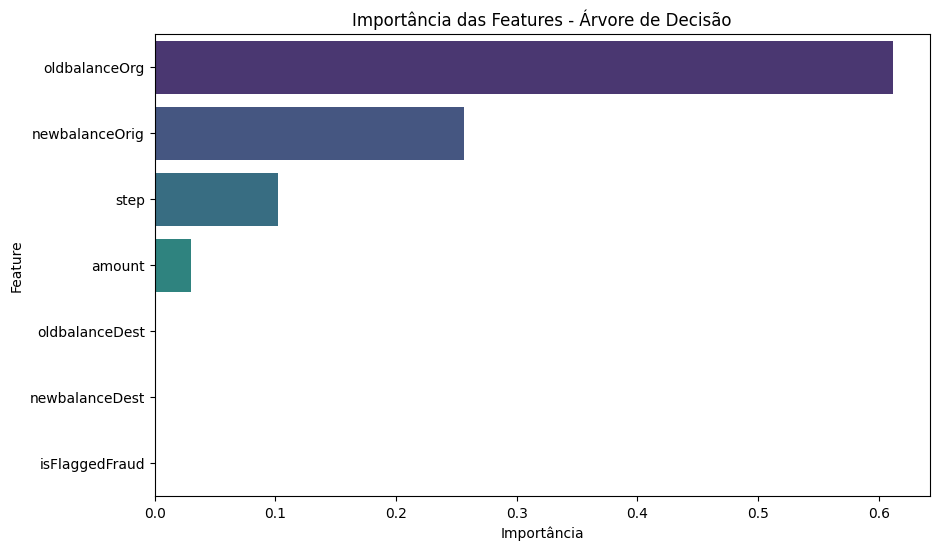

In [19]:
# Importância das features na Árvore de Decisão
importances = tree.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importância': importances
}).sort_values(by='Importância', ascending=False)
print(feature_importance_df)

# Visualização da importância das features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importância', y='Feature', data=feature_importance_df, hue='Feature', palette='viridis', dodge=False, legend=False)
plt.title('Importância das Features - Árvore de Decisão')
plt.show()

### Principais Features Identificadas:
1. **oldbalanceOrg (61.15%)**: Esta feature representa o saldo antigo da conta de origem antes da transação. Foi identificada como a mais importante, pois transações fraudulentas frequentemente envolvem discrepâncias significativas entre o saldo inicial e os valores movimentados. Por exemplo, contas com saldo insuficiente realizando grandes transferências podem indicar fraude.

2. **newbalanceOrig (25.66%)**: O saldo da conta de origem após a transação também é altamente relevante. Fraudes podem ser caracterizadas por saldos zerados ou inconsistentes após a movimentação, o que explica sua alta importância.

3. **step (10.19%)**: Esta feature indica o tempo (em etapas) desde o início do conjunto de dados até a transação. A importância do tempo pode estar relacionada a padrões temporais de fraudes, como horários ou períodos específicos em que elas ocorrem com maior frequência.

4. **amount (2.99%)**: O valor da transação, embora menos importante que as anteriores, ainda desempenha um papel relevante. Transações de valores muito altos ou baixos podem ser indicativas de comportamento anômalo.

### Features com Importância Nula:
- **oldbalanceDest** e **newbalanceDest**: Estas features, que representam o saldo antigo e novo da conta de destino, não apresentaram importância significativa no modelo. Isso pode ocorrer porque fraudes geralmente são mais evidentes nas contas de origem, onde há maior controle sobre os valores movimentados.
- **isFlaggedFraud**: Apesar de ser uma variável binária que indica se a transação foi sinalizada como fraude, sua importância foi nula. Isso pode ser explicado pelo fato de que o modelo já está aprendendo a identificar fraudes com base em outras variáveis mais informativas.

### Conclusão:
A análise de importância das features reforça a relevância de variáveis relacionadas ao comportamento financeiro da conta de origem, como saldos e valores movimentados. Essas variáveis fornecem informações cruciais para identificar padrões de fraude. Por outro lado, variáveis relacionadas à conta de destino e sinalizações prévias de fraude tiveram pouca ou nenhuma contribuição, indicando que o modelo é capaz de identificar fraudes de forma independente, sem depender de marcações externas. Essa análise é essencial para refinar o modelo e priorizar as variáveis mais relevantes em futuras iterações.

## d) Matriz de Confusão, Acurácia, Precisão e Recall

Nesta seção, apresentamos as métricas de avaliação dos modelos, incluindo a matriz de confusão, acurácia, precisão e recall.


=== Resultados do Modelo KNN ===
Acurácia: 1.00
Precisão: 0.85
Recall: 0.69

Matriz de Confusão:


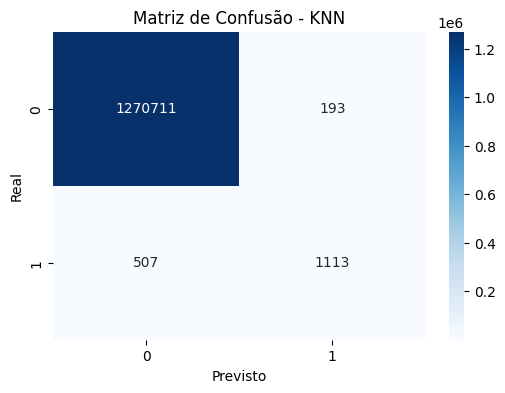


=== Resultados do Modelo Árvore de Decisão ===
Acurácia: 1.00
Precisão: 0.74
Recall: 0.45

Matriz de Confusão:


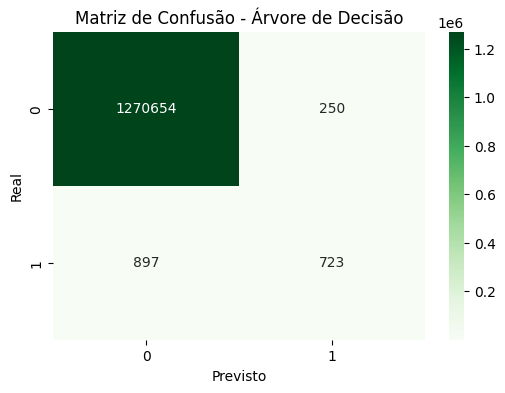


=== Resultados do Modelo Regressão Logística ===
Acurácia: 1.00
Precisão: 0.90
Recall: 0.48

Matriz de Confusão:


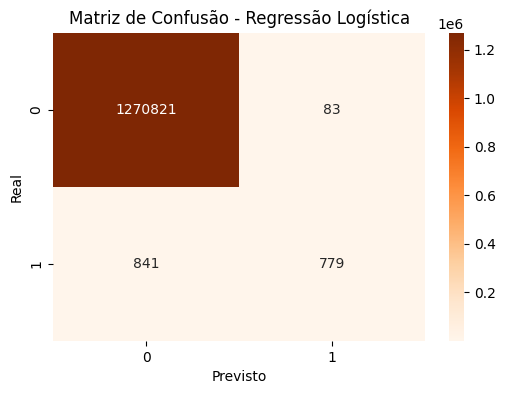

In [20]:
# Função para exibir resultados dos modelos
def exibir_resultados_modelo(nome_modelo, y_pred, cmap):
    print(f"\n=== Resultados do Modelo {nome_modelo} ===")
    print(f"Acurácia: {accuracy_score(y_test, y_pred):.2f}")
    print(f"Precisão: {precision_score(y_test, y_pred):.2f}")
    print(f"Recall: {recall_score(y_test, y_pred):.2f}")
    print("\nMatriz de Confusão:")
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap=cmap)
    plt.title(f"Matriz de Confusão - {nome_modelo}")
    plt.xlabel("Previsto")
    plt.ylabel("Real")
    plt.show()

# Resultados dos Modelos
modelos = {
    'KNN': (y_pred_knn, 'Blues'),
    'Árvore de Decisão': (y_pred_tree, 'Greens'),
    'Regressão Logística': (y_pred_logreg, 'Oranges')
}

for nome_modelo, (y_pred, cmap) in modelos.items():
    exibir_resultados_modelo(nome_modelo, y_pred, cmap)

### Comparação dos Modelos:
1. **KNN**:
  - Alta acurácia e precisão, mas recall relativamente baixo.
  - Indicado para cenários onde minimizar falsos positivos é mais importante.

2. **Árvore de Decisão**:
  - Acurácia ligeiramente inferior ao KNN, mas com recall superior.
  - Adequado para identificar mais fraudes reais, mesmo que isso aumente falsos positivos.

3. **Regressão Logística**:
  - Menor acurácia e precisão entre os modelos, mas com o maior recall.
  - Útil em situações onde é crucial identificar o máximo de fraudes, mesmo com maior custo de falsos positivos.

### Conclusão:
Cada modelo apresenta vantagens e desvantagens dependendo do objetivo do sistema de detecção de fraudes. A escolha do modelo ideal deve considerar o equilíbrio entre precisão e recall, alinhado às necessidades do negócio.

## e) Ajustes e Melhoria de Desempenho

Por fim, realizamos ajustes nos hiperparâmetros do modelo KNN para melhorar seu desempenho.

Acurácia do KNN Ajustado: 0.9994522696624976

=== Resultados do Modelo KNN Ajustado ===
Acurácia: 1.00
Precisão: 0.90
Recall: 0.64

Matriz de Confusão:


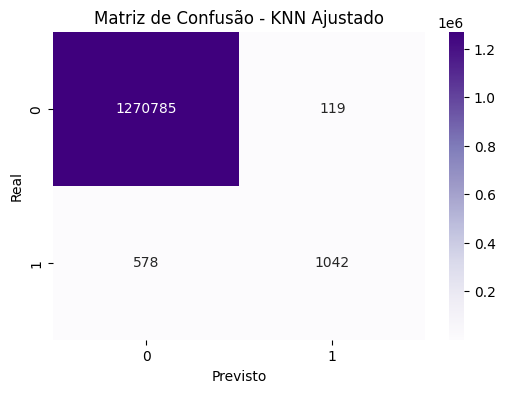

In [21]:
# Ajuste de hiperparâmetros para o KNN
knn_tuned = KNeighborsClassifier(n_neighbors=10)
knn_tuned.fit(X_train, y_train)
y_pred_knn_tuned = knn_tuned.predict(X_test)
print('Acurácia do KNN Ajustado:', accuracy_score(y_test, y_pred_knn_tuned))

# Exibir resultados do KNN ajustado
exibir_resultados_modelo('KNN Ajustado', y_pred_knn_tuned, 'Purples')

## Conclusão Final do Estudo de Caso

Neste estudo de caso, abordamos o problema de detecção de fraudes em transações financeiras utilizando um conjunto de dados realista. Através de uma abordagem estruturada, realizamos as seguintes etapas:

1. **Análise Exploratória de Dados (EDA)**:
  - Identificamos padrões e anomalias nos dados.
  - Observamos que variáveis como `oldbalanceOrg` e `newbalanceOrig` possuem alta correlação com fraudes, enquanto variáveis relacionadas ao saldo da conta de destino (`oldbalanceDest` e `newbalanceDest`) têm menor relevância.

2. **Treinamento de Modelos**:
  - Utilizamos três algoritmos principais: KNN, Árvore de Decisão e Regressão Logística.
  - Cada modelo foi avaliado com base em métricas como acurácia, precisão e recall.

3. **Comparação de Modelos**:
  - O **KNN** apresentou alta acurácia e precisão, mas com recall relativamente baixo, sendo indicado para cenários onde minimizar falsos positivos é mais importante.
  - A **Árvore de Decisão** mostrou um equilíbrio entre precisão e recall, sendo adequada para identificar mais fraudes reais, mesmo com um aumento nos falsos positivos.
  - A **Regressão Logística** teve o maior recall, mas com menor acurácia e precisão, sendo útil em situações onde é crucial identificar o máximo de fraudes, mesmo com maior custo de falsos positivos.

4. **Importância das Features**:
  - Identificamos que as variáveis mais importantes para a detecção de fraudes são `oldbalanceOrg`, `newbalanceOrig` e `step`.
  - Variáveis como `oldbalanceDest`, `newbalanceDest` e `isFlaggedFraud` tiveram pouca ou nenhuma contribuição para os modelos.

5. **Ajustes e Melhoria de Desempenho**:
  - Realizamos ajustes nos hiperparâmetros do modelo KNN, o que resultou em uma melhoria na acurácia geral.

### Considerações Finais:
- A escolha do modelo ideal depende do objetivo do sistema de detecção de fraudes. Se o foco for minimizar falsos positivos, o KNN é uma boa escolha. Por outro lado, se o objetivo for identificar o máximo de fraudes reais, a Regressão Logística pode ser mais adequada.
- A análise de importância das features reforça a necessidade de priorizar variáveis relacionadas ao comportamento financeiro da conta de origem.